In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Customer Churn Analysis

## Project Goal

This project aims to identify the main factors driving customer churn through exploratory data analysis and predictive modeling. By analyzing customer behavior and service characteristics, the study seeks to provide actionable insights to support retention strategies and informed decision-making.

## Dataset
Source: Kaggle – Telco Customer Churn  
Records represent individual customers from a telecommunications company.

## Target Variable
- **Churn**: Indicates whether a customer left the company (Yes/No).

In [5]:
##Converting data type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')



In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Overall Churn Rate

The dataset shows the proportion of customers who churned versus those who stayed.
This metric is important to understand the baseline churn behavior of the company.


In [7]:
churn_rate= df['Churn'].value_counts(normalize=True)*100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

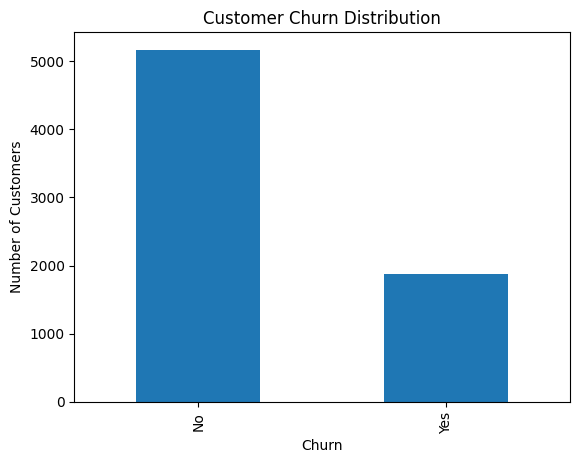

In [8]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


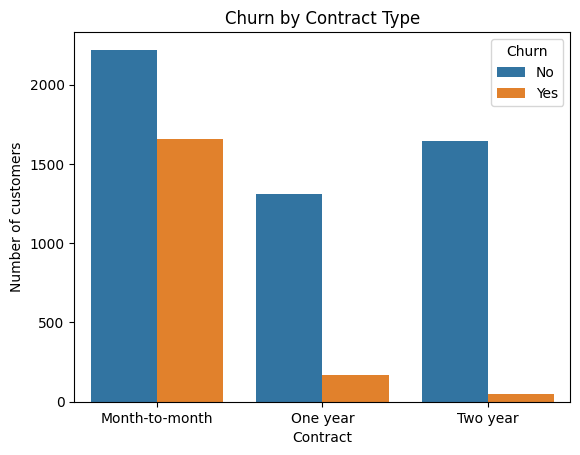

In [9]:
import seaborn as sns

sns.countplot(data=df, x='Contract', hue='Churn').set(ylabel='Number of customers')
plt.title('Churn by Contract Type')
plt.show()


Text(0.5, 1.0, 'Tenure by contract')

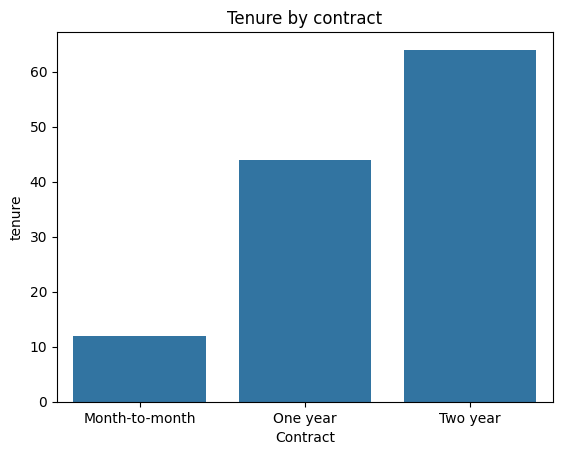

In [10]:
contractVStenure= df.groupby('Contract')['tenure'].median().reset_index()
sns.barplot(data=contractVStenure,x='Contract',y='tenure')
plt.title('Tenure by contract')

### Churn by Contract Type

This chart shows that the shorter the contract period, the higher the churn rate. 
This behavior may occur because customers with month-to-month contracts also have a low tenure, which indicate that they are often testing the service or anticipate that they may eventually cancel. 

In contrast, customers with one-year or two-year contracts are more likely to have access to promotional pricing and tend to be more dependent on the service (highlighted by higher tenure), which reduces the likelihood of churn.



In [11]:
df.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


<Figure size 800x500 with 0 Axes>

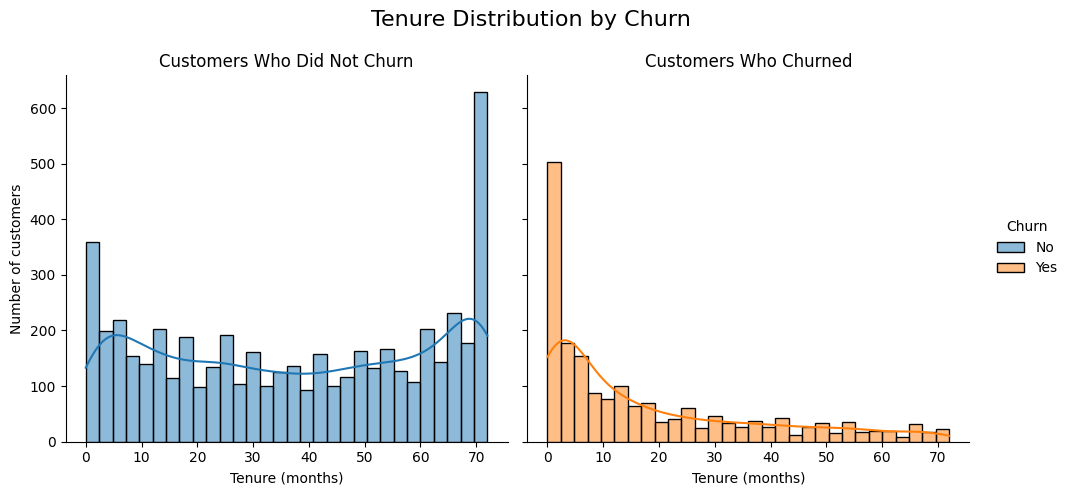

In [12]:
plt.figure(figsize=(8,5))
p=sns.displot(kind='hist',data=df, x='tenure', hue='Churn',col='Churn', bins=30, kde=True)
p.set_axis_labels("Tenure (months)", "Number of customers")
p.set_titles(col_template="{col_name}")  # temporarily shows 'No' and 'Yes'

# Optional: replace 'Yes'/'No' with full text
titles_map = {"No": "Customers Who Did Not Churn", "Yes": "Customers Who Churned"}
for ax in p.axes.flat:
    ax.set_title(titles_map[ax.get_title()])
    p.fig.suptitle('Tenure Distribution by Churn', fontsize=16)

# Adjust the layout to make room for the suptitle
p.fig.subplots_adjust(top=0.85)  # 0.85 = 85% of figure height, leaving room at the top
plt.show()


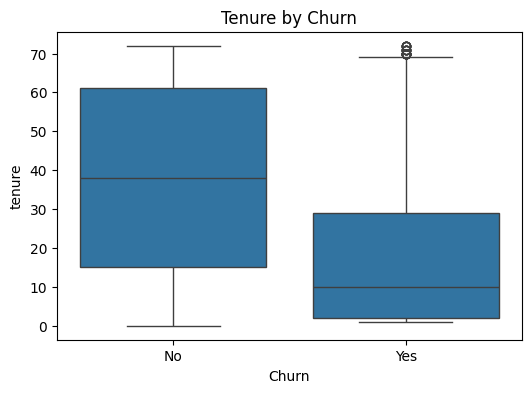

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()


### Tenure and Churn

This distributions reaffirm the relation between tenure and churn. Customers who churn tend to have very short tenures, mostly within the first few months. In contrast, customers who do not churn are more evenly distributed across longer tenure periods, suggesting that retention increases significantly after the initial months of service.

Concluding that churn is more likely to occur during the early stages of the customer lifecycle, it highlight the importance of onboarding and early engagement strategies.


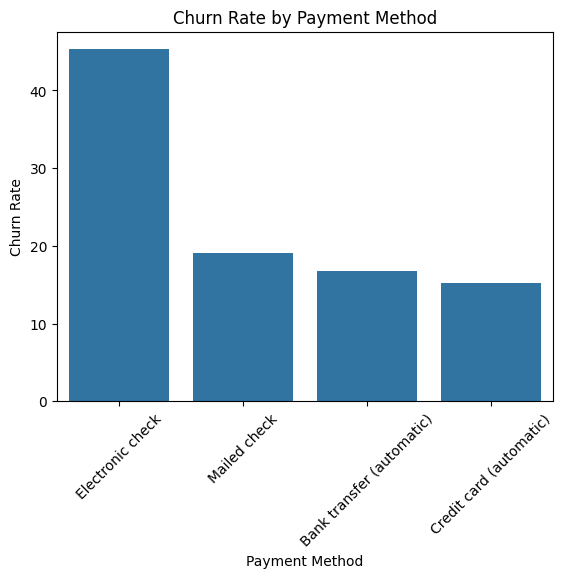

In [14]:
churn_rate=df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()*100
churn_yes= churn_rate['Yes'].sort_values(ascending=False)
sns.barplot(
    x=churn_yes.index,
    y=churn_yes.values
)

plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)

plt.show()



### The chart shows a clear association between the Electronic check payment method and a higher churn rate.

Since churn is rarely driven by a single factor, this relationship may be influenced by other customer characteristics. In the following analysis, we further investigate this pattern by exploring contract type, tenure, and monthly charges to better understand what drives churn among Electronic check customers.

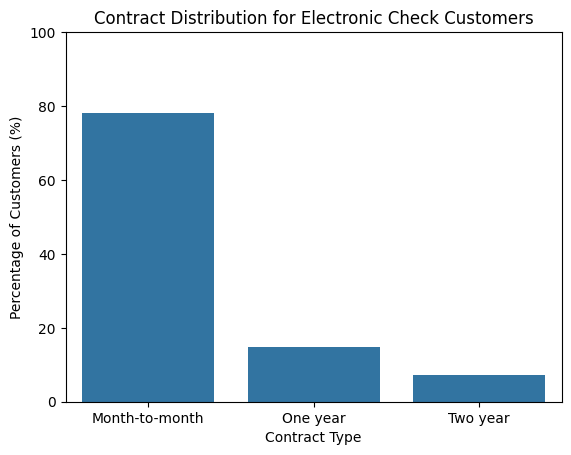

In [15]:
ContractVSPayMet= pd.crosstab(df.PaymentMethod,df.Contract, normalize='index').loc['Electronic check']*100

sns.barplot(x=ContractVSPayMet.index,y=ContractVSPayMet.values)
plt.title('Contract Distribution for Electronic Check Customers')
plt.ylabel('Percentage of Customers (%)')
plt.xlabel('Contract Type')
plt.ylim(0, 100)

plt.show()

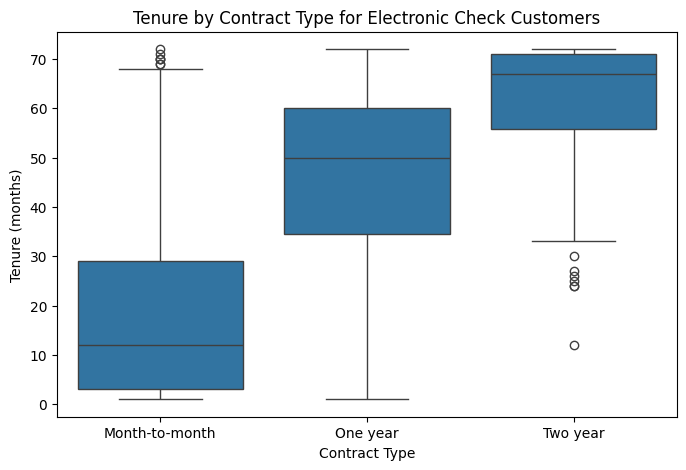

In [16]:
ec_df = df[df['PaymentMethod'] == 'Electronic check']

plt.figure(figsize=(8,5))
sns.boxplot(data=ec_df, x='Contract', y='tenure')

plt.title('Tenure by Contract Type for Electronic Check Customers')
plt.ylabel('Tenure (months)')
plt.xlabel('Contract Type')

plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

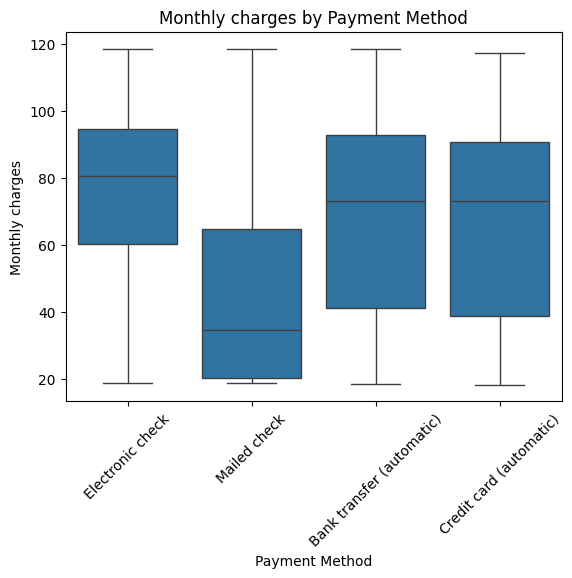

In [17]:
sns.boxplot(data=df,x='PaymentMethod',y= 'MonthlyCharges')
plt.title('Monthly charges by Payment Method')
plt.ylabel('Monthly charges')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)


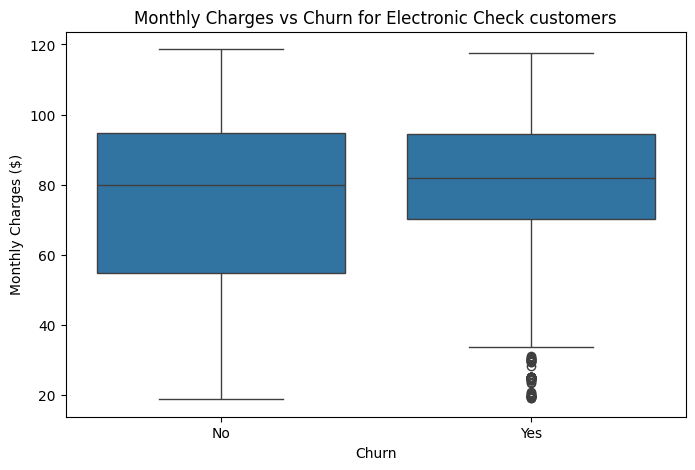

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=ec_df,
    x='Churn',
    y='MonthlyCharges'
)

plt.title('Monthly Charges vs Churn for Electronic Check customers')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')

plt.show()


## Final conclusion of payment method and churn. 

Customers using Eletronic check are majority in monthly contracts, what is directcly related with higher churn rate aligned with that the lower tenure also are significantly to the increased churn rate of this payment Method. Although customers using Electronic check show a slightly higher tendency to pay more per month, monthly charges alone do not strongly explain churn behavior.The analysis indicates that customer loyalty factors, such as contract duration and tenure, are far more relevant. 

## Estimated Churn Reduction if High-Risk Customers Are Retained

In [19]:
overall_churn = (df['Churn'] == 'Yes').mean()
overall_churn=overall_churn*100


In [20]:
total_customers = len(df) #Count the num. of customers
total_churners = (df['Churn'] == 'Yes').sum()

# churners in the two critical segments
churn_mtm = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]
churn_early = df[(df['tenure'] <= 3) & (df['Churn'] == 'Yes')]

# union (avoid double counting)
churn_critical = pd.concat([churn_mtm, churn_early]).drop_duplicates()

reduced_churners = total_churners - len(churn_critical)
new_churn_rate = (reduced_churners / total_customers)*100

overall_churn, new_churn_rate


(np.float64(26.536987079369588), np.float64(3.0100809314212693))

In [21]:
impact = pd.DataFrame({
    'Scenario': ['Current churn rate', 'Churn without early & month-to-month'],
    'Churn Rate (%)': [overall_churn, new_churn_rate]
})
impact

,Scenario,Churn Rate (%)
0,Current churn rate,26.536987
1,Churn without early & month-to-month,3.010081


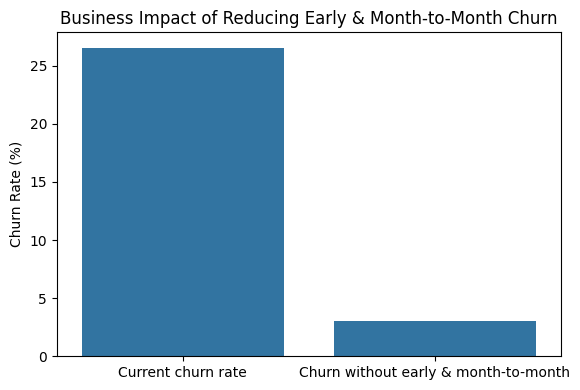

In [22]:
plt.figure(figsize=(6,4))

sns.barplot(data=impact, x='Scenario', y='Churn Rate (%)')

plt.title('Business Impact of Reducing Early & Month-to-Month Churn')
plt.ylabel('Churn Rate (%)')
plt.xlabel('')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Key insights 

* Customers with month-to-month contracts exhibit significantly higher churn rates, while those with one-year and two-year contracts show much lower churn.

* Customer tenure is a critical driver of retention: churn is heavily concentrated in the first months of the customer lifecycle, particularly within the first three months.

* Although customers using Electronic check present higher churn rates, this effect is largely indirect and explained by their strong association with month-to-month contracts and low tenure.

* Monthly charges show only a weak relationship with churn, indicating that price alone is not the primary reason customers leave.

* Overall, the analysis indicates that churn is driven less by pricing and payment method, and more by customer commitment and relationship maturity.

This analysis shows that focusing on early engagement and long-term commitment could have a strong impact on churn reduction. Under a hypothetical scenario targeting high-risk customers in short-term contracts, overall churn could be reduced by up to 88%, emphasizing the value of data-driven retention strategies.

## Business Recommendations

* Strengthen early-stage retention by implementing onboarding, engagement, and support programs focused on the first 90 days of the customer journey.

* Incentivize migration from month-to-month to long-term contracts through discounts, loyalty rewards, or bundled services.

* Proactively monitor high-risk customers, particularly those using Electronic check and holding month-to-month contracts, to intervene before churn occurs.

* Focus retention strategies on increasing tenure, as extending customer relationships has a significantly higher impact on churn reduction than price adjustments. 

# Predicting Customer Churn with Machine Learning

The goal of this section is to build a machine learning model capable of predicting whether a customer is likely to churn, based on contractual, behavioral, and service-related characteristics. This model can support early retention strategies by identifying high-risk customers before churn occurs.


In [23]:
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
features = [
    'tenure',
    'MonthlyCharges',
    'Contract',
    'PaymentMethod',
     'InternetService',
    'OnlineSecurity',
    'TechSupport'
]

X = pd.get_dummies(df[features],drop_first=True)
y = df['Churn_binary']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [25]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[740, 295],
       [ 83, 291]])

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



Since the business cost of missing a churner is higher than incorrectly flagging a loyal customer, we prioritize recall(the percentage of churners correctly identified) for churners over overall accuracy. The class weighting was adjusted to reduce false negatives and improve the model’s usefulness for retention strategies.

In [27]:

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance


InternetService_Fiber optic              0.564059
PaymentMethod_Electronic check           0.486071
PaymentMethod_Mailed check               0.052213
MonthlyCharges                           0.012519
PaymentMethod_Credit card (automatic)   -0.002471
tenure                                  -0.027510
TechSupport_No internet service         -0.288621
OnlineSecurity_No internet service      -0.288621
InternetService_No                      -0.288621
TechSupport_Yes                         -0.401972
OnlineSecurity_Yes                      -0.521670
Contract_One year                       -0.769210
Contract_Two year                       -1.467669
dtype: float64

The feature importance results are consistent with the EDA, indicating that contract length is a key factor in churn behavior, with longer contracts strongly associated with lower churn risk.


In [28]:
from sklearn.ensemble import RandomForestClassifier

model_forest= RandomForestClassifier(max_depth=5,
    min_samples_split=30,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42)


model_forest.fit(X_train, y_train)


pred_forest= model_forest.predict(X_test)

from sklearn.metrics import accuracy_score
print( classification_report(y_test,pred_forest ))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



A Random Forest model was tested to capture potential non-linear patterns in the data. However, its performance was similar to the logistic regression model in terms of accuracy and recall. This indicates that the main challenge lies in the data structure itself rather than in the choice of a more complex model.


In [29]:
feature_importance_forest = pd.Series(
    model_forest.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance_forest.head(10)


tenure                                0.228123
Contract_Two year                     0.202339
InternetService_Fiber optic           0.141577
PaymentMethod_Electronic check        0.089427
MonthlyCharges                        0.078899
Contract_One year                     0.069648
OnlineSecurity_No internet service    0.040567
InternetService_No                    0.037342
TechSupport_No internet service       0.037103
OnlineSecurity_Yes                    0.035514
dtype: float64

The feature importance results from the Random Forest model indicate which variables are most useful for separating churners from non-churners, rather than the direction of their impact. Consistent with previous analyses, tenure and contract-related features appear as the most influential variables, reinforcing the idea that customer loyalty and long-term commitment are the primary drivers of churn behavior.


 #### Further test in different models

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)
pred_knn = model_knn.predict(X_test)
print( classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.55      0.51      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=30,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


[[731 304]
 [ 80 294]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.79      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409



### Predictive Modeling Results

Multiple models were tested to predict customer churn, including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors.

- Logistic Regression provided clear interpretability and aligned well with the exploratory analysis, confirming the importance of tenure and contract type.
- Tree-based models captured non-linear patterns in tenure but did not significantly outperform logistic regression in overall performance.
- Class imbalance handling improved recall for churners, at the cost of precision and overall accuracy, highlighting the trade-off between identifying more churners and avoiding false alarms.

Overall, the models demonstrate moderate predictive performance, which is expected given the behavioral nature of churn and the limited feature set.


### Final Conclusion

This project combined exploratory data analysis and predictive modeling to understand the main drivers of customer churn. The analysis consistently showed that customer tenure and contract length are the most influential factors, outweighing pricing and payment-related variables. While machine learning models were able to identify churn patterns with reasonable performance, the results also highlight the inherent difficulty of predicting churn with high accuracy due to customer behavior variability. Overall, the findings emphasize that improving customer loyalty through early engagement and long-term contracts is the most effective strategy to reduce churn, and that predictive models should be used as decision-support tools rather than exact predictors.
